In [77]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [78]:
def synthetic_data(w, b, num_examples):  # @save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 10000)

In [79]:
print("features:", features[0], "\nlabel:", labels[0])

features: tensor([-0.7749, -0.6941]) 
label: tensor([5.0268])


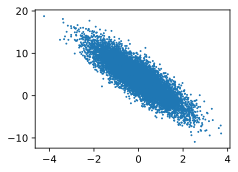

In [80]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [81]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [82]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, "\n", y)
    break

tensor([[ 1.0618,  1.1973],
        [-0.6454,  2.1121],
        [-0.8202,  0.8138],
        [-0.3898,  0.0833],
        [ 0.9519,  0.3920],
        [-0.6350, -0.4243],
        [ 0.0762, -1.8306],
        [-0.6772, -0.5837],
        [-1.2823, -0.4339],
        [ 0.8899,  0.2111]]) 
 tensor([[ 2.2615],
        [-4.2567],
        [-0.2183],
        [ 3.1399],
        [ 4.7801],
        [ 4.3771],
        [10.5696],
        [ 4.8270],
        [ 3.1085],
        [ 5.2696]])


In [83]:
w = torch.normal(0, 100, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
(w, b)

(tensor([[-104.1159],
         [-189.8243]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [84]:
def linreg(X, w, b):  # @save
    """线性回归模型。"""
    return torch.matmul(X, w) + b


def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [85]:
## 训练过程
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [86]:
# 训练

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050


In [87]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 5.4967e-04, -2.3842e-07], grad_fn=<SubBackward0>)
b的估计误差: tensor([3.2425e-05], grad_fn=<RsubBackward1>)
